# Life History analysis via PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#import kaleido
import plotly.express as px
import plotly.graph_objects as go

## Load and inspect data

### Columns
Species : the name of the biological species  
am: lifespan (log transformed)  
Wwi: ultimate weight (log transformed)  
Ri: Reporiduction rate  
Wwb: weight at birth  
Li: ultimate length  
ab: debelopment at birth  


In [ ]:
# Load the dataset
df_life = pd.read_csv('data/lifehistory_df.csv')
df_basiceco = pd.read_csv('data/basicecodf.csv')
 
display(df_life.head())
display(df_basiceco.head())

,species,am,Wwi,Ri,Wwb,Li,ab
0,Symsagittifera_roscoffensis,-2.263097,-2.681943,0.018237,-1.610842,-2.223594,-0.870294
1,Aequipecten_opercularis,-0.059093,-0.275378,1.639591,-2.351822,-0.854880,-1.373181
2,Mimachlamys_varia,-0.400497,-0.622221,1.639591,-2.351822,-0.944853,-1.373181
3,Mytilus_edulis,0.778895,-0.231961,1.392184,-2.764869,-0.464663,-3.043736
4,Panopea_abbreviata,2.507146,0.675057,2.385215,-1.703486,-0.074446,-1.876068


,ID,ecozone,gender,reproduction,embryo
0,Symsagittifera_roscoffensis,M,H,O,M
1,Aequipecten_opercularis,M,H,O,M
2,Mimachlamys_varia,M,H,O,M
3,Mytilus_edulis,M,D,O,M
4,Panopea_abbreviata,M,D,O,M


In [ ]:
# Check for missing values and data types
print(df_life.info())
print(df_life.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  1108 non-null   object 
 1   am       1108 non-null   float64
 2   Wwi      1108 non-null   float64
 3   Ri       1108 non-null   float64
 4   Wwb      1108 non-null   float64
 5   Li       1108 non-null   float64
 6   ab       1108 non-null   float64
dtypes: float64(6), object(1)
memory usage: 60.7+ KB
None
species    0
am         0
Wwi        0
Ri         0
Wwb        0
Li         0
ab         0
dtype: int64


In [4]:
# Check for duplicates
df_life.nunique()

species    1108
am          192
Wwi         871
Ri          635
Wwb         403
Li          423
ab          251
dtype: int64

## PCA

In [5]:
features = df_life[['am', 'Wwi', 'Ri', 'Wwb', 'Li', 'ab']]

X = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([ df_life[['species']], pca_df], axis = 1)
final_df.head()


,species,PC1,PC2
0,Symsagittifera_roscoffensis,-4.332599,-1.319409
1,Aequipecten_opercularis,-2.418778,1.949067
2,Mimachlamys_varia,-2.773367,1.725362
3,Mytilus_edulis,-2.602300,2.953991
4,Panopea_abbreviata,-0.460463,3.460949


## Explained variance

In [6]:
explained_variance = pca.explained_variance_ratio_

pc1_var = explained_variance[0] * 100
pc2_var = explained_variance[1] * 100

print(f"PC1: {pc1_var:.2f}%")
print(f"PC2: {pc2_var:.2f}%")

PC1: 47.39%
PC2: 37.59%


## Visualisation

In [7]:
# Merge the 'Wwi' column from df_life into final_df
final_df['Wwi'] = df_life['Wwi']
final_df['Ri'] = df_life['Ri']

# Merge df_basiceco into final_df
final_df['ecozone'] = df_basiceco['ecozone']
final_df['gender'] = df_basiceco['gender']
final_df['reproduction'] = df_basiceco['reproduction']
final_df['embryo'] = df_basiceco['embryo']

final_df.head()

,species,PC1,PC2,Wwi,Ri,ecozone,gender,reproduction,embryo
0,Symsagittifera_roscoffensis,-4.332599,-1.319409,-2.681943,0.018237,M,H,O,M
1,Aequipecten_opercularis,-2.418778,1.949067,-0.275378,1.639591,M,H,O,M
2,Mimachlamys_varia,-2.773367,1.725362,-0.622221,1.639591,M,H,O,M
3,Mytilus_edulis,-2.602300,2.953991,-0.231961,1.392184,M,D,O,M
4,Panopea_abbreviata,-0.460463,3.460949,0.675057,2.385215,M,D,O,M


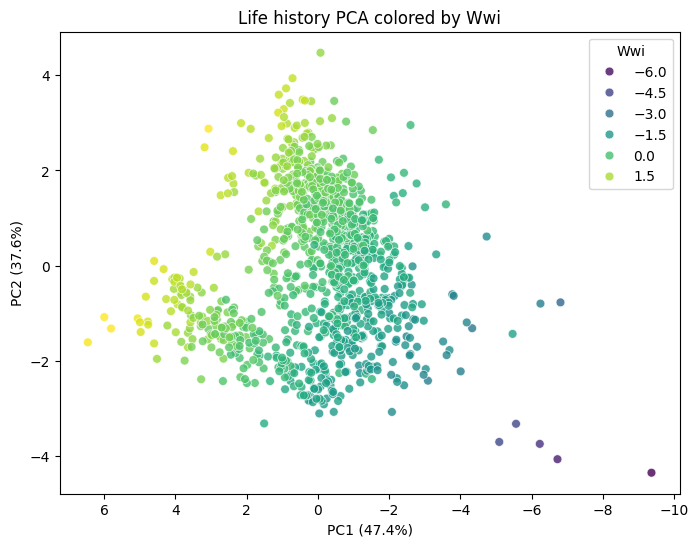

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=final_df, x="PC1", y="PC2", hue="Wwi", palette="viridis", s=40, alpha=0.8)
plt.title("Life history PCA colored by Wwi")
plt.xlabel(f"PC1 ({pc1_var:.1f}%)")
plt.ylabel(f"PC2 ({pc2_var:.1f}%)")
plt.gca().invert_xaxis()   #invert x-axis
plt.show()

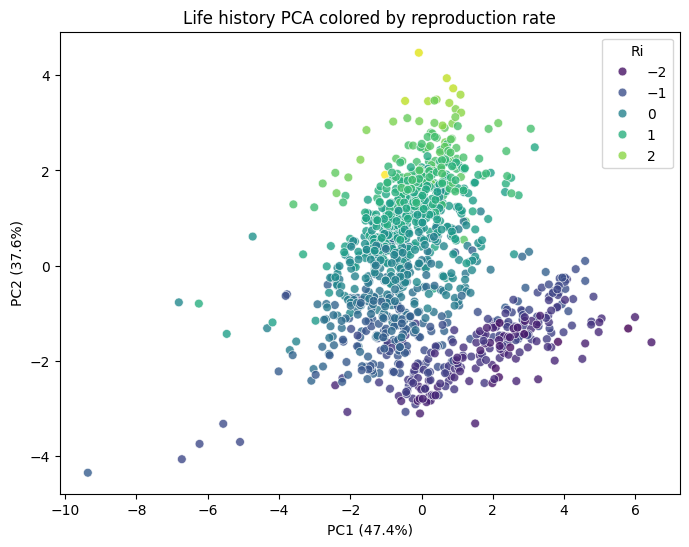

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=final_df, x="PC1", y="PC2", hue="Ri", palette="viridis", s=40, alpha=0.8)
plt.title("Life history PCA colored by reproduction rate")
plt.xlabel(f"PC1 ({pc1_var:.1f}%)")
plt.ylabel(f"PC2 ({pc2_var:.1f}%)")
plt.show()

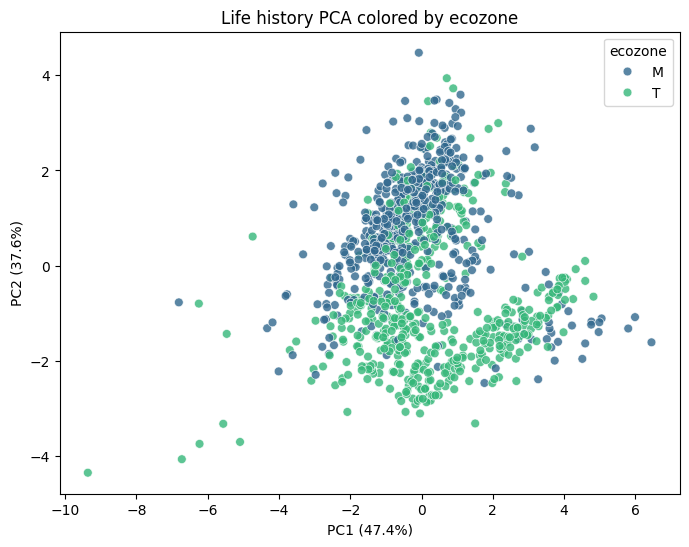

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=final_df, x="PC1", y="PC2", hue="ecozone", palette="viridis", s=40, alpha=0.8)
plt.title("Life history PCA colored by ecozone")
plt.xlabel(f"PC1 ({pc1_var:.1f}%)")
plt.ylabel(f"PC2 ({pc2_var:.1f}%)")
plt.show()

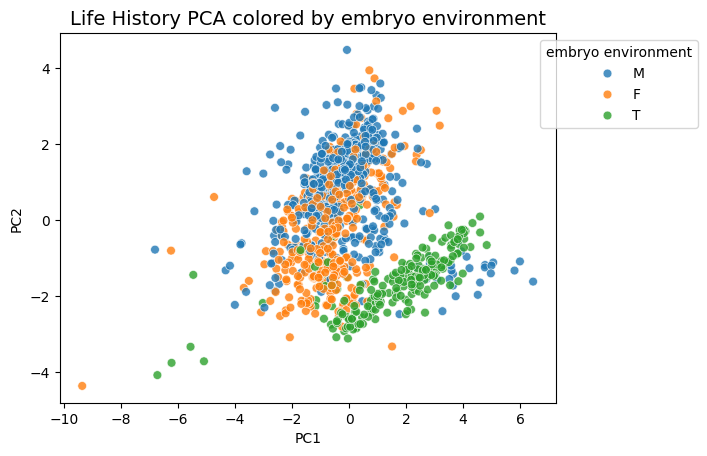

In [11]:
#sns.scatterplot(data=final_df, x="PC1", y="PC2", palette="viridis", s=60) #hue="Wwi"
sns.scatterplot(data=final_df, x="PC1", y="PC2", hue="embryo", palette="tab10", s=40, alpha=0.8)

plt.title("Life History PCA colored by embryo environment", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="embryo environment", loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [18]:
fig = go.Figure(data=go.Scatter(
    x=final_df['PC1'],
    y=final_df['PC2'],
    mode='markers',
    marker=dict(
        size=8,
        color=final_df['Wwi'],  
        colorscale='Viridis',  
        showscale=True,
    ),
    text=final_df['species'],  
    name=""
))

# Variables
loadings = pca.components_.T * np.sqrt(explained_variance)

x_range = principal_components[:, 0].max() - principal_components[:, 0].min()
y_range = principal_components[:, 1].max() - principal_components[:, 1].min()

scale = 0.3 * np.mean([x_range, y_range])
scaled_loadings = loadings * scale

for i, feature in enumerate(features):
    x = scaled_loadings[i, 0]
    y = scaled_loadings[i, 1]

    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=scaled_loadings[i, 0],
        y=scaled_loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top",
        #arrowcolor="black",
    )

    fig.add_annotation(
        x=x * 1.2,  
        y=y * 1.2,
        text=feature,
        showarrow=False,
        font=dict(size=12),
        xanchor="center",
        yanchor="middle",
    )
    

fig.update_layout(
    title="Biplot of Life History traits colored by Wwi",
    xaxis_title=f"PC1 ({pc1_var:.1f}%)",
    yaxis_title=f"PC2 ({pc2_var:.1f}%)",
    legend_title="Wwi",

)
fig.show()
#fig.write_html("biplot.html")


In [13]:
fig = go.Figure(data=go.Scatter(
    x=final_df['PC1'],
    y=final_df['PC2'],
    mode='markers',
    marker=dict(
        size=8,
        color=final_df['Wwi'],  
        colorscale='Viridis',  
        showscale=True
    ),
    text=final_df['species'],  
    showlegend=False,
    name=''
))

# Variables
loadings = pca.components_.T * np.sqrt(explained_variance)

x_range = principal_components[:, 0].max() - principal_components[:, 0].min()
y_range = principal_components[:, 1].max() - principal_components[:, 1].min()

scale = 0.3 * np.mean([x_range, y_range])
scaled_loadings = loadings * scale

for i, feature in enumerate(features):

    x, y = scaled_loadings[i, 0], scaled_loadings[i, 1]

    # Line + text
    fig.add_trace(go.Scatter(
        x=[0, scaled_loadings[i, 0]],
        y=[0, scaled_loadings[i, 1]],
        mode='lines+text',
        line=dict(color='black', width=2),
        text=[None, feature],
        textposition='top center',
        marker=dict(size=1),
        name=feature,
        showlegend=False
    ))

    # Arrow 
    fig.add_annotation(
        x=x,
        y=y,
        ax=0,
        ay=0,
        xref="x", yref="y",
        axref="x", ayref="y",
        showarrow=True,
        arrowhead=3,
        arrowsize=1,
        arrowwidth=1.5,
        arrowcolor="black"
        )
    

fig.update_layout(
    title="Biplot of Life History traits colored by Wwi",
    xaxis_title=f"PC1 ({pc1_var:.1f}%)",
    yaxis_title=f"PC2 ({pc2_var:.1f}%)"
)
fig.show()
#fig.write_html("biplot.html")


### Correlation circle plot

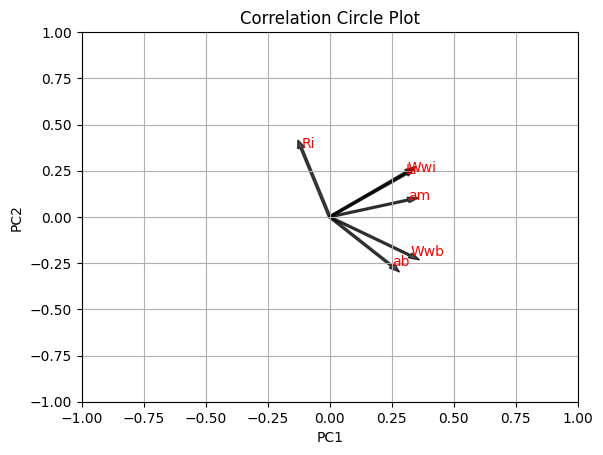

In [14]:

loadings = pca.components_.T * np.sqrt(explained_variance)

plt.title('Correlation Circle Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
for i, feature in enumerate(['am', 'Wwi', 'Ri', 'Wwb', 'Li', 'ab']):

    # Add the name of the variable near the arrow
    plt.annotate(feature,
                 (loadings[i, 0],
                  loadings[i, 1]),
                 color='red')
    
    # Add an arrow representing the variable on the new axis
    plt.arrow(0, 0,
              loadings[i, 0],
              loadings[i, 1],
              color='black',
              alpha=0.7, 
              width=0.01,
             )

plt.xlim(-1,1)
plt.ylim(-1,1)

plt.grid(True)
plt.show()